In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pystan
%matplotlib inline

In [2]:
plt.style.use("ggplot")

データの読み込み    

In [3]:
df = pd.read_excel("./data/data.xlsx")
df.head()

,Unnamed: 0,0
0,0,3.896195
1,1,5.865766
2,2,5.860887
3,3,4.660614
4,4,5.263595


(array([ 1.,  1.,  5., 12., 10., 18., 16.,  8.,  5.,  4.]),
 array([2.29193477, 2.77510498, 3.25827519, 3.74144541, 4.22461562,
        4.70778584, 5.19095605, 5.67412627, 6.15729648, 6.64046669,
        7.12363691]),
 <a list of 10 Patch objects>)

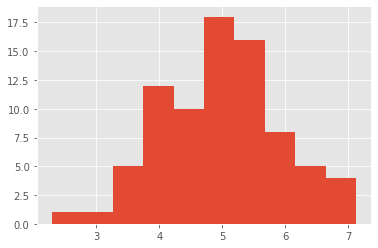

In [4]:
plt.hist(df[0])

PyStanでモデルを記述

In [5]:
stan_model = """
// 外部からもらうデータのブロック
data {
    int N;
    real Y[N];
}

// 推定するパラメータのブロック
parameters {
    real mu;
    real<lower=0> sigma; // 非負であることを宣言
}

// 統計モデルの記述ブロック
model {
    // 全てのデータは独立に推定するパラメータの正規分布に従う
    for (i in 1:N) {
        Y[i] ~ normal(mu, sigma);
    }
}

// 事前分布として無情報事前分布を使うので事前分布のブロックは書かない
"""

In [6]:
sm = pystan.StanModel(model_code=stan_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5c782183ffd74fefe3ab2ee767902ce9 NOW.


In [7]:
stan_data = {"N": df.shape[0], "Y": df[0]}

In [8]:
fit = sm.sampling(data=stan_data, iter=2000, chains = 3, warmup=500, seed=123)

In [9]:
fit

Inference for Stan model: anon_model_5c782183ffd74fefe3ab2ee767902ce9.
3 chains, each with iter=2000; warmup=500; thin=1; 
post-warmup draws per chain=1500, total post-warmup draws=4500.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu      4.98  1.8e-3   0.11   4.76   4.91   4.98   5.05   5.19   3601    1.0
sigma   0.97  1.4e-3   0.08   0.83   0.92   0.97   1.02   1.14   3220    1.0
lp__  -37.06    0.02   1.01 -39.68 -37.45 -36.75 -36.35  -36.1   2071    1.0

Samples were drawn using NUTS at Sat Aug 17 21:46:22 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

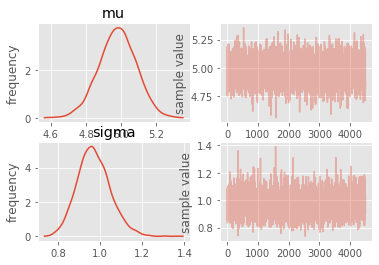

In [11]:
fig = fit.plot()